In [4]:
import pandas as pd
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import glob
import numpy as np

%run /Users/hollyzhuang/Desktop/Haase_Lab/python_functions/heatmap.py
%run /Users/hollyzhuang/Desktop/Haase_Lab/python_functions/stripey.py
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [6]:
# import the dataset
#wdir = '/Users/sophi/OneDrive/WIP/FastOn/'
#raw = pd.read_csv(os.path.join(wdir, "data/idea_tall_expression_data.tsv"), sep = "\t")

In [17]:
raw = pd.read_csv("idea_tall_expression_data.tsv", sep = "\t")

In [21]:
raw[:5]

,TF,strain,date,restriction,mechanism,time,GeneName,green_median,red_median,log2_ratio,log2_cleaned_ratio,log2_noise_model,log2_cleaned_ratio_zth2d,log2_selected_timecourses,log2_shrunken_timecourses
200,ACA1,SMY2049,02/29/2016,P,ZEV,0.0,ACE2,1750.0910,1629.8440,0.000000,0.000000,0.129407,0.0,0.0,0.0
201,ACA1,SMY2049,02/29/2016,P,ZEV,5.0,ACE2,1724.5360,1779.5775,0.153899,0.077198,0.123848,0.0,0.0,0.0
202,ACA1,SMY2049,02/29/2016,P,ZEV,10.0,ACE2,1674.7350,1793.8890,0.207727,0.130756,0.137038,0.0,0.0,0.0
203,ACA1,SMY2049,02/29/2016,P,ZEV,15.0,ACE2,1776.8985,1778.6880,0.108363,0.044595,0.137734,0.0,0.0,0.0
204,ACA1,SMY2049,02/29/2016,P,ZEV,20.0,ACE2,1288.4680,1228.7140,0.040906,0.000000,0.129807,0.0,0.0,0.0


In [8]:
# For these purposes, wanted a non-normalized value. So created column with that.
# raw = raw.rename(columns={"log2_ratio":"log2_ratio_norm"})
# raw["log2_ratio"] = np.log2(raw["red_median"]/raw["green_median"])

In [18]:
# list of 25 wavepool
wavepool = ["CLN3", "WHI5", "STB1", "CLN1", "CLN2", "YOX1", "YHP1", "SWI4", "MBP1", "NRM1", "CDH1", "CLB5", "CLB6", "HCM1", "TOS4", "PLM2", "FKH1", "FKH2", "MCM1", "NDD1", "CDC20", "ACE2", "SWI5", "CLB2", "ASH1"]
# filter the wavepool genes b/c only interested in gene names in the wavepool graph
raw = raw.loc[raw.GeneName.isin(wavepool)]
# only these tf genes are treated with estradiol in the IDEA dataset
wavepool_tf = ["WHI5", "STB1", "YOX1", "YHP1", "MBP1", "NRM1", "HCM1", "FKH1", "FKH2", "ACE2", "SWI5", "ASH1"]

In [14]:
# using Haase lab color scheme for heatmaps
haase = matplotlib.colors.LinearSegmentedColormap.from_list('', ['cyan', 'black', 'yellow'])

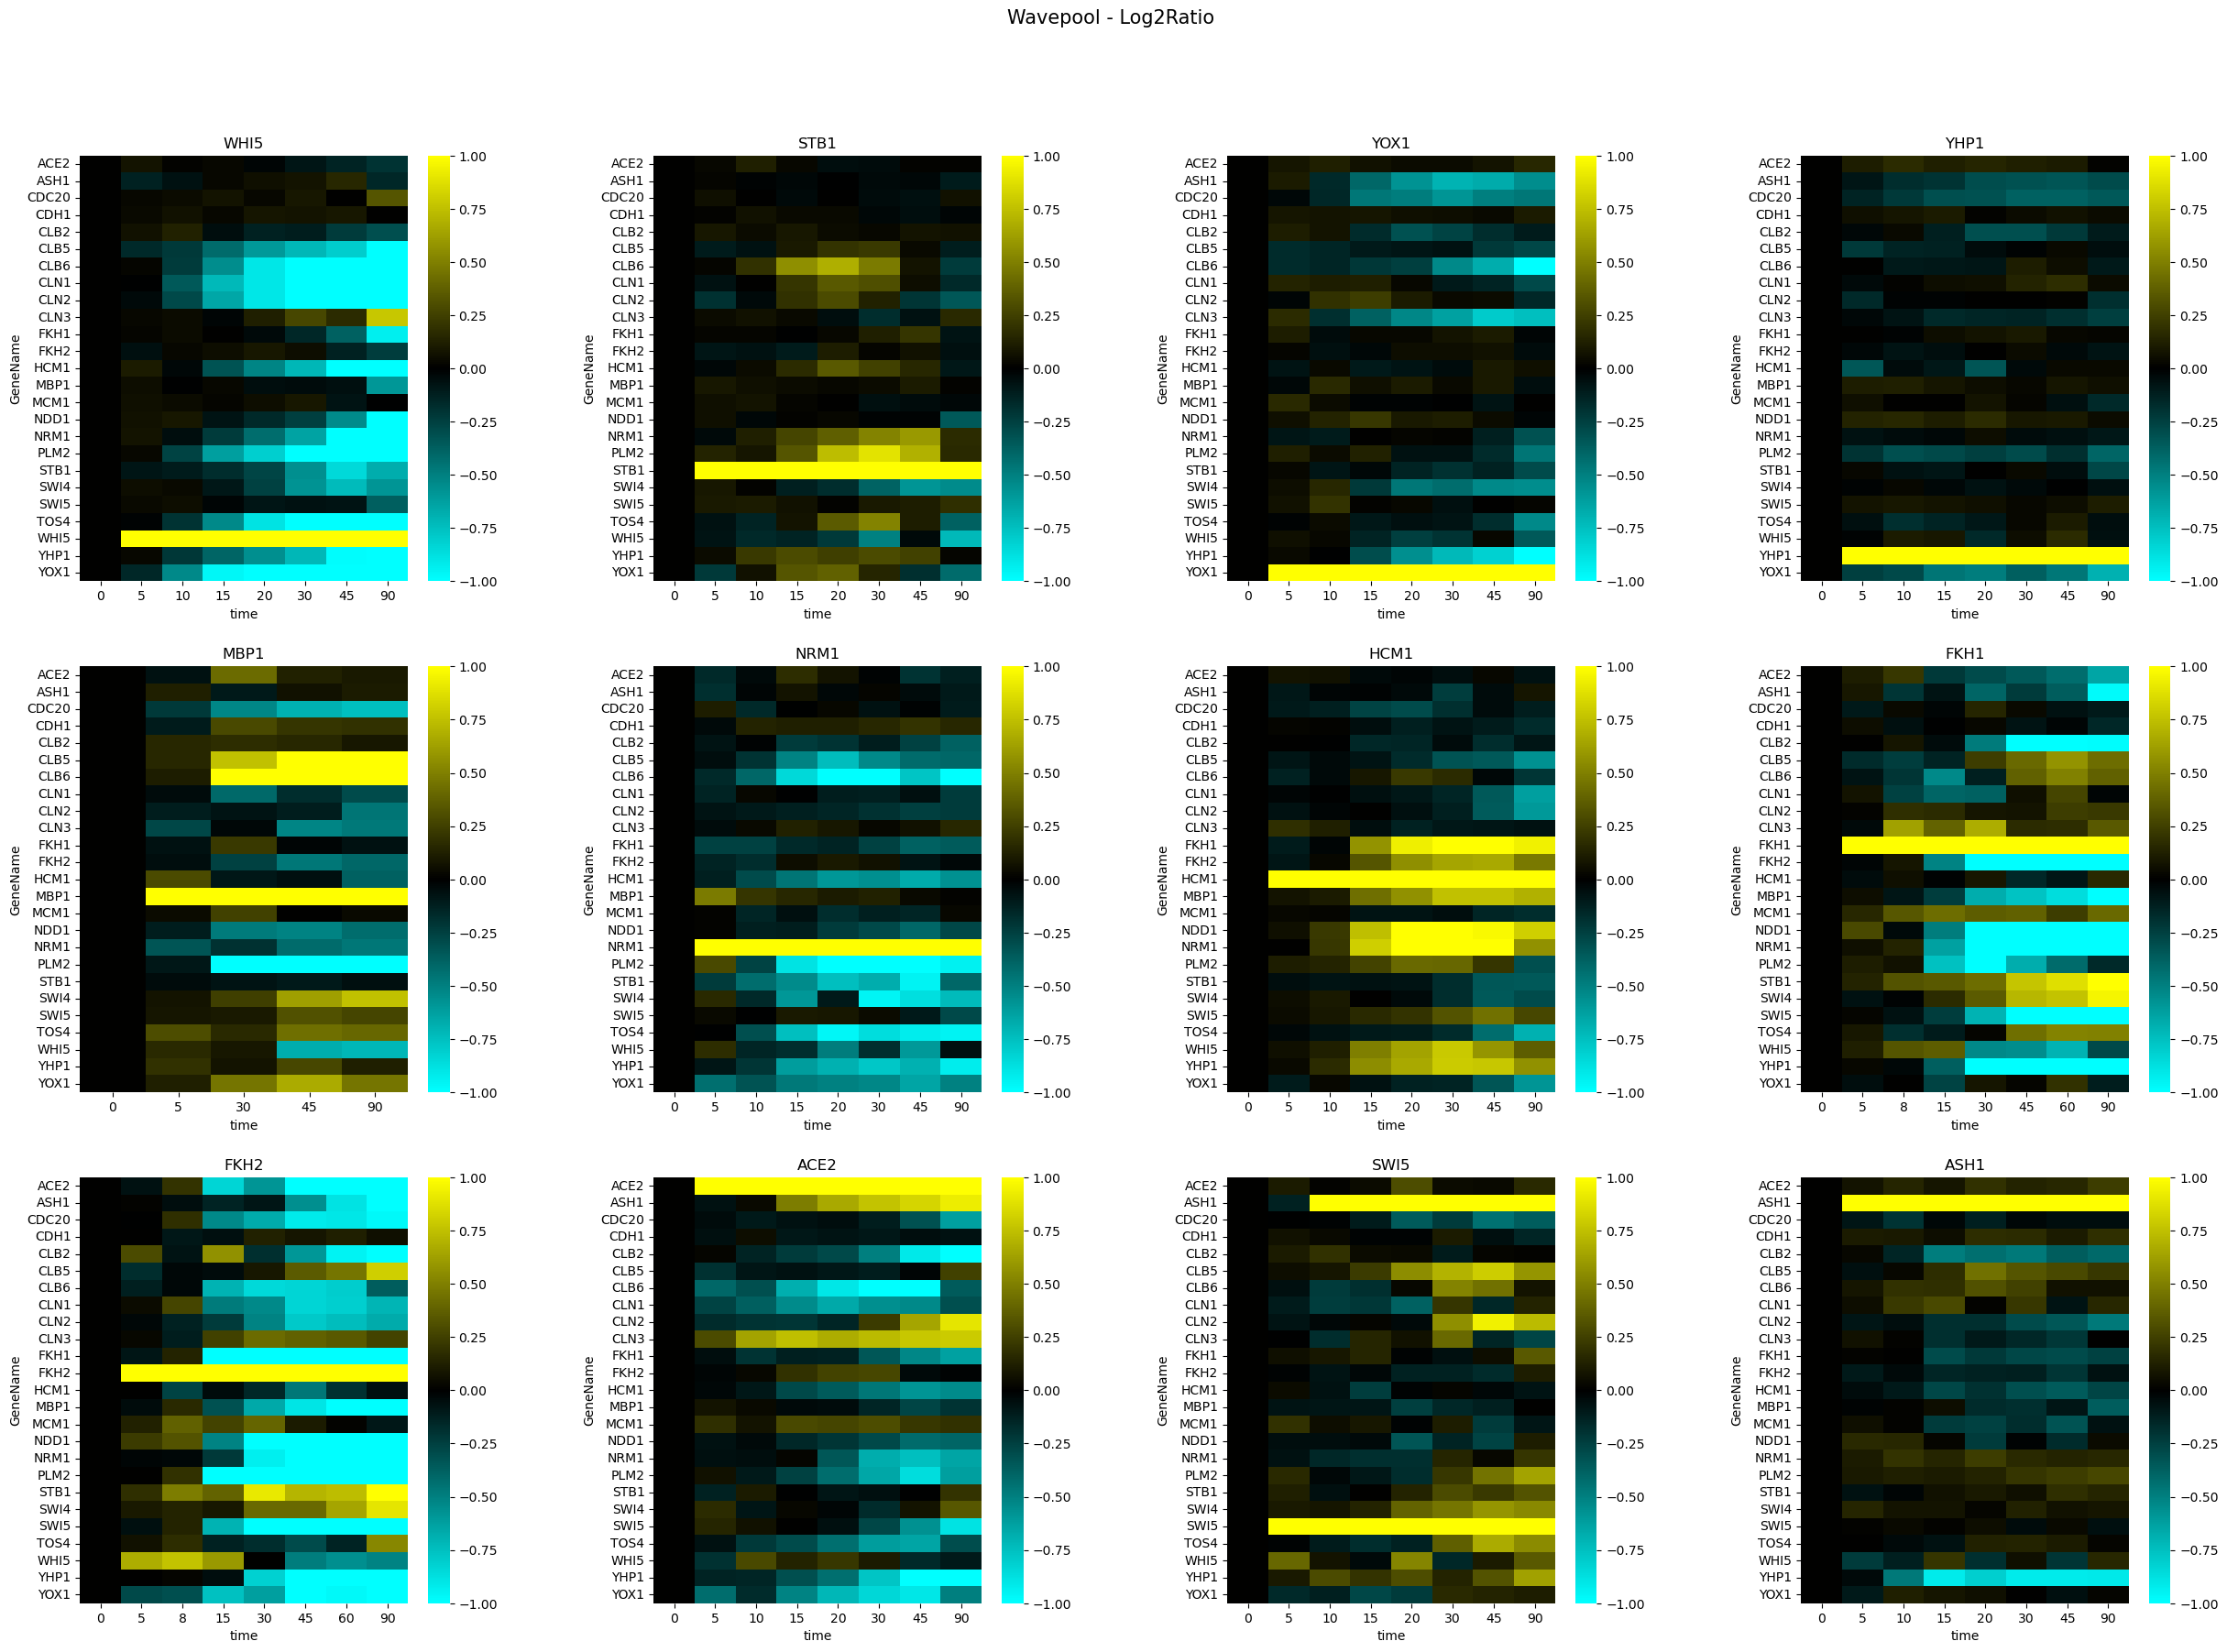

In [24]:
fig = plt.figure(figsize = (30,20))
fig.subplots_adjust(hspace=0.2, wspace=0.4, top = 0.90)
fig.suptitle("Wavepool - Log2Ratio", fontsize = 15)

#loop through all the wavepool tfs (regulators)
for i in range(0, len(wavepool_tf)):
    # set title to tf for this heatmap
    tf = list(wavepool_tf)[i]
    
    # make subplot
    plt.subplot(3, 4,i+1,title = tf)
    
    sub_df = raw.loc[raw.TF==tf]
    sub_df = sub_df[["GeneName", "time", "log2_ratio"]]
    
    sub_df['time'] = sub_df['time'].astype(int)  # convert time string to int
    heatmap_plt_df = sub_df.pivot_table(index='GeneName', columns='time', values='log2_ratio')
    heatmap_plt_df.fillna(value=np.nan, inplace=True)
    
    ax = sns.heatmap(heatmap_plt_df, cmap = haase, vmin = -1.0, vmax = 1.0, yticklabels = True)

In [20]:
heatmap_plt_df[:5]

time,0.0,10.0,15.0,20.0,30.0,45.0,5.0,90.0
GeneName,,,,,,,,
ACE2,0.0,0.011284,0.025288,-0.017890,-0.078244,-0.138070,0.076484,-0.199220
ASH1,0.0,-0.063072,0.030066,0.054742,0.073117,0.149171,-0.129233,-0.150361
CDC20,0.0,0.041668,0.076503,0.024033,0.087446,0.007756,0.029640,0.333856
CDH1,0.0,0.064584,0.029590,0.082309,0.073665,0.090107,0.034278,0.003738
CLB2,0.0,0.128155,-0.050008,-0.126309,-0.116571,-0.229283,0.062981,-0.312014


In [38]:
example_df = raw.loc[raw.TF=="CLN3"]
example_df = example_df[["GeneName", "time", "log2_ratio"]]

example_df

,GeneName,time,log2_ratio


In [30]:
whi5_df['time'] = whi5_df['time'].astype(str)  # Ensure time is a string if it's not already
new_df = whi5_df.pivot_table(index='GeneName', columns='time', values='log2_ratio')
new_df

time,0.0,10.0,15.0,20.0,30.0,45.0,5.0,90.0
GeneName,,,,,,,,
ACE2,0.0,0.011284,0.025288,-0.017890,-0.078244,-0.138070,0.076484,-0.199220
ASH1,0.0,-0.063072,0.030066,0.054742,0.073117,0.149171,-0.129233,-0.150361
CDC20,0.0,0.041668,0.076503,0.024033,0.087446,0.007756,0.029640,0.333856
CDH1,0.0,0.064584,0.029590,0.082309,0.073665,0.090107,0.034278,0.003738
CLB2,0.0,0.128155,-0.050008,-0.126309,-0.116571,-0.229283,0.062981,-0.312014
CLB5,0.0,-0.222403,-0.420946,-0.597497,-0.718252,-0.802475,-0.163522,-1.155501
CLB6,0.0,-0.229085,-0.554514,-0.899296,-1.511650,-2.323220,0.022054,-4.122400
CLN1,0.0,-0.347702,-0.723611,-0.899396,-1.243478,-1.746427,-0.007013,-2.586528
CLN2,0.0,-0.281940,-0.651764,-0.902646,-1.287046,-1.926507,-0.033939,-1.870762


<Axes: xlabel='time', ylabel='GeneName'>

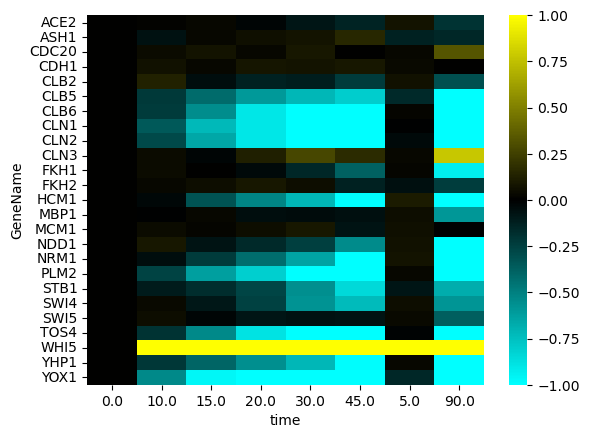

In [31]:
ax = sns.heatmap(new_df, cmap = haase, vmin = -1.0, vmax = 1.0, yticklabels = True)
ax

In [ ]:
fig = plt.figure(figsize = (15,10))
fig.subplots_adjust(hspace=0.2, wspace=0.4, top = 0.90)
fig.suptitle("Wavepool - Log2Ratio", fontsize = 15)


#loop through all the stress tfs (regulators)
for i in range(0, len(wavepool)):
    # set title to tf for this heatmap
    tf = list(wavepool)[i]
    
    # make subplot
    plt.subplot(5, 5,i+1,title = tf)
    
    # create a smaller sub df with just the rows where the regulator is the tf and the columns are the gene name (target wavepool gene), the time, and the value
    sub_df = raw.loc[raw.TF==tf]
    sub_df = sub_df[["GeneName", "time", "log2_ratio"]]
    
    wavepool_new = wavepool.copy()
    
    #create new df with the index as the wavepool (target) genes and the columns as the times. Sort. This df is what will be plotted and consists of the values for each time point for each target for a specific tf 
    sub_df['time'] = sub_df['time'].astype(str)  # Ensure time is a string if it's not already
    new_df = sub_df.pivot_table(index='GeneName', columns='time', values='log2_ratio')
    #new_df = new_df.sort_index(axis=1)
    
    # loop through the genes (targets) and fill in the new df
    #for gene in wavepool_new:
        #for time in new_df.columns:
            #new_df.loc[gene, time] = float(sub_df.loc[sub_df.GeneName == gene].loc[sub_df.time ==time, "log2_ratio"])
    #new_df.fillna(value=np.nan, inplace=True)

    ax = sns.heatmap(new_df, cmap = haase, vmin = -1.0, vmax = 1.0, yticklabels = True)
    
## note for holly, sometimes the dataset will have multiple experiments with the same tf. In this case, the above method wouldn't work properly. You'd need to split them or filter one out.